In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

kernel = np.ones((7, 7), np.uint8)

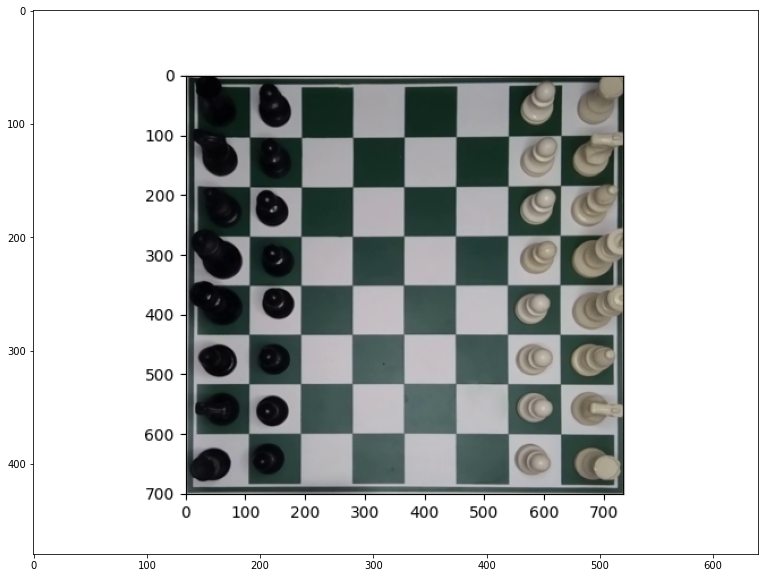

In [2]:
im1=cv2.imread("./photos/prev.png")
plt.figure(figsize = (16,10))
plt.imshow(im1)

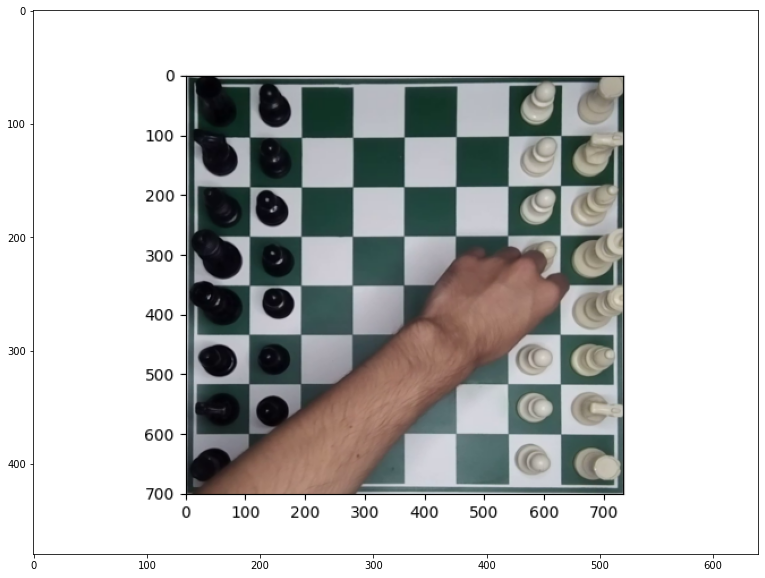

In [3]:
im2=cv2.imread("./photos/act.png")
plt.figure(figsize = (16,10))
plt.imshow(im2)

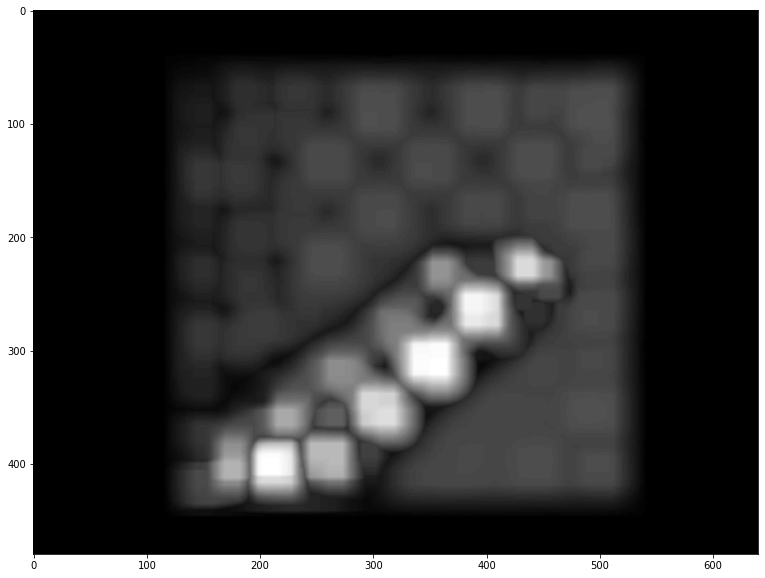

In [4]:
prev_frame=cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
frame=cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
prev_blur = cv2.blur(prev_frame, (29, 29), 1)
blur = cv2.blur(frame, (29, 29), 1)

diff = cv2.absdiff(prev_blur, blur)
diff = cv2.dilate(diff, kernel, iterations = 2)
plt.figure(figsize = (16,10))
plt.imshow(diff, cmap = 'gray')

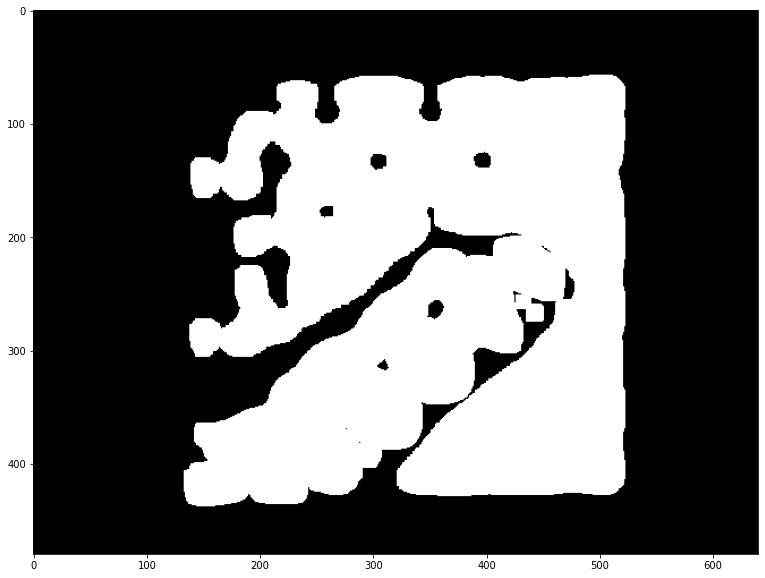

In [5]:
_, thresh = cv2.threshold(diff, 15, 255, cv2.THRESH_BINARY)
plt.figure(figsize = (16,10))
plt.imshow(thresh, cmap='gray')

In [6]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
hand = False
for contour in contours:
    #Discrimina el dibujo de rectangulos cuando el movimiento es muy pequeño
    if cv2.contourArea(contour) > 500:
        hand = True
        break
    
hand

True